Let's Calculate the baseline:
-----

Extract the data and separate into San Juan and Iquitos

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [6]:
trainFeatures = pd.read_csv("./data/dengue_features_train.csv", index_col=0)

In [7]:
trainFeatures = pd.read_csv("./data/dengue_features_train.csv", index_col=0)
trainLabels = pd.read_csv("./data/dengue_labels_train.csv", index_col=0)

In [8]:
trainPreSJ = trainFeatures.loc["sj"]
trainPreIQ = trainFeatures.loc["iq"]

labelPreSJ = trainLabels.loc["sj"]
labelPreIQ = trainLabels.loc["iq"]

In [9]:
trainPreSJ = trainPreSJ.drop(["week_start_date"], axis=1)
trainPreSJ = trainPreSJ.drop(["year"], axis=1)
trainPreSJ = trainPreSJ.drop(["weekofyear"], axis=1)
trainPreIQ = trainPreIQ.drop(["week_start_date"], axis=1)
trainPreIQ = trainPreIQ.drop(["year"], axis=1)
trainPreIQ = trainPreIQ.drop(["weekofyear"], axis=1)

In [10]:
trainSJ = trainPreSJ.iloc[3:]
trainIQ = trainPreIQ.iloc[3:]
labelSJ = labelPreSJ.iloc[3:]
labelIQ = labelPreIQ.iloc[3:]

In [13]:
pd.isnull(trainSJ).sum() > 0


ndvi_ne                                           False
ndvi_nw                                           False
ndvi_se                                           False
ndvi_sw                                           False
precipitation_amt_mm                              False
reanalysis_air_temp_k                             False
reanalysis_avg_temp_k                             False
reanalysis_dew_point_temp_k                       False
reanalysis_max_air_temp_k                         False
reanalysis_min_air_temp_k                         False
reanalysis_precip_amt_kg_per_m2                   False
reanalysis_relative_humidity_percent              False
reanalysis_sat_precip_amt_mm                      False
reanalysis_specific_humidity_g_per_kg             False
reanalysis_tdtr_k                                 False
station_avg_temp_c                                False
station_diur_temp_rng_c                           False
station_max_temp_c                              

Fill empty data with the previous value in the column

In [12]:
trainSJ.fillna(method='ffill', inplace=True)
trainIQ.fillna(method='ffill', inplace=True)
trainSJ

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_avg_temp_k_shifted1,reanalysis_min_air_temp_k_shifted3,reanalysis_min_air_temp_k_shifted2,reanalysis_min_air_temp_k_shifted1,station_avg_temp_c_shifted3,station_avg_temp_c_shifted2,station_avg_temp_c_shifted1,station_min_temp_c_shifted3,station_min_temp_c_shifted2,station_min_temp_c_shifted1
city,,,,,,,,,,,,,,,,,,,,,
sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,298.878571,295.9,296.4,297.3,25.442857,26.714286,26.714286,20.0,22.2,22.8
sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,299.228571,296.4,297.3,297.0,26.714286,26.714286,27.471429,22.2,22.8,23.3
sj,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,...,299.664286,297.3,297.0,297.5,26.714286,27.471429,28.942857,22.8,23.3,23.9
sj,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,...,299.764286,297.0,297.5,298.1,27.471429,28.942857,28.114286,23.3,23.9,23.9
sj,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,...,299.221429,297.5,298.1,297.7,28.942857,28.114286,27.414286,23.9,23.9,23.3
sj,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,...,299.528571,298.1,297.7,298.4,28.114286,27.414286,28.371429,23.9,23.3,22.8
sj,0.102450,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,...,299.557143,297.7,298.4,297.7,27.414286,28.371429,28.328571,23.3,22.8,22.8
sj,0.192875,0.082350,0.191943,0.152929,22.27,299.512857,299.592857,296.041429,301.8,298.0,...,300.278571,298.4,297.7,298.7,28.371429,28.328571,28.328571,22.8,22.8,24.4
sj,0.291600,0.211800,0.301200,0.280667,59.17,299.667143,299.750000,296.334286,302.0,297.3,...,299.592857,297.7,298.7,298.0,28.328571,28.328571,27.557143,22.8,24.4,21.7


Place the train labels with the features into one dataset

In [8]:
trainSJ["total_cases"]=labelSJ["total_cases"]
trainIQ["total_cases"]=labelIQ["total_cases"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Plot the pearson correlation and figure out which one has the highest correlation values with total_cases

In [9]:
correlationSJ = trainSJ.corr()
correlationIQ = trainIQ.corr()

In [12]:
totalCasesCorrSJ = correlationSJ[:-1]
totalCasesCorrSJ = totalCasesCorrSJ.iloc[:,-1]
sortedCorrSJ = totalCasesCorrSJ.sort_values()
sortedCorrSJ

reanalysis_tdtr_k                                -0.067893
ndvi_sw                                          -0.000162
ndvi_se                                           0.000616
ndvi_ne                                           0.024331
station_diur_temp_rng_c                           0.034243
ndvi_nw                                           0.050583
station_precip_mm                                 0.051463
precipitation_amt_mm                              0.059673
reanalysis_sat_precip_amt_mm                      0.059673
reanalysis_precip_amt_kg_per_m2                   0.107157
reanalysis_relative_humidity_percent              0.143725
reanalysis_avg_temp_k                             0.173981
station_min_temp_c                                0.176063
reanalysis_air_temp_k                             0.180594
reanalysis_min_air_temp_k                         0.186924
station_max_temp_c                                0.189444
reanalysis_max_air_temp_k                         0.1931

In [14]:
totalCasesCorrIQ = correlationIQ[:-1]
totalCasesCorrIQ = totalCasesCorrIQ.iloc[:,-1]
sortedCorrIQ = totalCasesCorrIQ.sort_values()
sortedCorrIQ

reanalysis_tdtr_k                                -0.135147
reanalysis_max_air_temp_k                        -0.058213
station_diur_temp_rng_c                          -0.047740
ndvi_se                                          -0.039688
ndvi_nw                                          -0.012032
ndvi_ne                                           0.016818
ndvi_sw                                           0.030197
station_precip_mm                                 0.040724
station_max_temp_c                                0.064797
reanalysis_avg_temp_k                             0.076850
reanalysis_avg_temp_k_shifted1                    0.079577
precipitation_amt_mm                              0.088326
reanalysis_sat_precip_amt_mm                      0.088326
reanalysis_avg_temp_k_shifted2                    0.089669
station_avg_temp_c                                0.092828
reanalysis_air_temp_k                             0.092986
reanalysis_precip_amt_kg_per_m2                   0.1007

Two simple features to look at are:
>reanalysis_specific_humidity_g_per_kg

>reanalysis_dew_point_temp_k


Data Splitting and randomizing
---

Now i will separate the data ~ 66% of the data will be used for training

In [15]:
numToTrainSJ = int(round(0.66 * trainSJ.shape[0]))
numToTestSJ = trainSJ.shape[0] - numToTrainSJ

subDataTrainSJ = trainSJ.head(numToTrainSJ)
subDataTestSJ = trainSJ.tail(numToTestSJ)

subDataTrainSJ = subDataTrainSJ.iloc[np.random.permutation(len(subDataTrainSJ))] 
subDataTestSJ = subDataTestSJ.iloc[np.random.permutation(len(subDataTestSJ))] 


In [16]:
numToTrainIQ = int(round(0.66 * trainIQ.shape[0]))
numToTestIQ = trainIQ.shape[0] - numToTrainIQ

subDataTrainIQ = trainIQ.head(numToTrainIQ)
subDataTestIQ = trainIQ.tail(numToTestIQ)

subDataTrainIQ = subDataTrainIQ.iloc[np.random.permutation(len(subDataTrainIQ))] 
subDataTestIQ = subDataTestIQ.iloc[np.random.permutation(len(subDataTestIQ))] 

Reshaping matrices to linear regression with 2 features, and also to calculate mean_absolute_error

In [17]:
subDataTrainFeaturesSJ = np.concatenate((subDataTrainSJ.loc[:,"reanalysis_specific_humidity_g_per_kg"].values.reshape(-1,1),
                                       subDataTrainSJ.loc[:,"reanalysis_dew_point_temp_k"].values.reshape(-1,1)), 
                                       axis=1)
subDataTrainLabelsSJ = subDataTrainSJ.loc[:,"total_cases"].values.reshape(-1,1)

In [18]:
subDataTrainFeaturesIQ = np.concatenate((subDataTrainIQ.loc[:,"reanalysis_specific_humidity_g_per_kg"].values.reshape(-1,1),
                                       subDataTrainIQ.loc[:,"reanalysis_dew_point_temp_k"].values.reshape(-1,1)), 
                                       axis=1)
subDataTrainLabelsIQ = subDataTrainIQ.loc[:,"total_cases"].values.reshape(-1,1)

In [19]:
from sklearn import linear_model
regrSJ = linear_model.LinearRegression()
regrSJ.fit(subDataTrainFeaturesSJ, subDataTrainLabelsSJ) 
print(regrSJ.coef_)

[[ 41.06859882 -33.01868089]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [20]:
regrIQ = linear_model.LinearRegression()
regrIQ.fit(subDataTrainFeaturesIQ, subDataTrainLabelsIQ) 
print(regrIQ.coef_)

[[ 11.06403744  -9.54614753]]


In [21]:
subDataTrainPredictSJ = regrSJ.predict(subDataTrainFeaturesSJ)

In [22]:
subDataTrainPredictIQ = regrIQ.predict(subDataTrainFeaturesIQ)

Calculate Error
---

In [23]:

from sklearn.metrics import mean_absolute_error

mean_absolute_error(subDataTrainLabelsSJ,subDataTrainPredictSJ)

31.617218590937821

In [24]:
mean_absolute_error(subDataTrainLabelsIQ,subDataTrainPredictIQ)

5.7318998893697755

Plotting my Values, (This looks wrong but im not sure... ill talk to you about it...sorry)

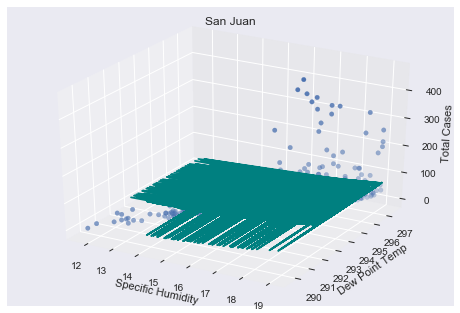

In [25]:
X1,Y1 = np.meshgrid(subDataTrainFeaturesSJ[:,0],subDataTrainFeaturesSJ[:,1])
Z1 = np.meshgrid(subDataTrainPredictSJ)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d")

ax1.plot_wireframe(X1,Y1,Z1, color="teal")
ax1.scatter(subDataTrainFeaturesSJ[:,0],subDataTrainFeaturesSJ[:,1],subDataTrainLabelsSJ)

ax1.set_xlabel('Specific Humidity')
ax1.set_ylabel('Dew Point Temp')
ax1.set_zlabel('Total Cases')
ax1.set_title("San Juan")


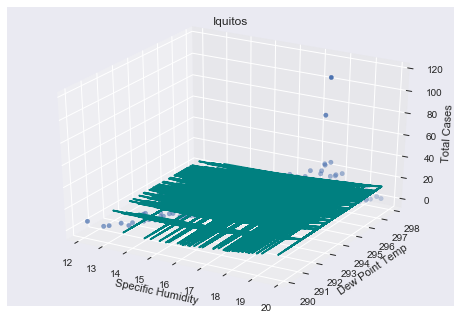

In [26]:
X2,Y2 = np.meshgrid(subDataTrainFeaturesIQ[:,0],subDataTrainFeaturesIQ[:,1])
Z2 = np.meshgrid(subDataTrainPredictIQ)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")

ax2.plot_wireframe(X2,Y2,Z2, color="teal")
ax2.scatter(subDataTrainFeaturesIQ[:,0],subDataTrainFeaturesIQ[:,1],subDataTrainLabelsIQ)

ax2.set_xlabel('Specific Humidity')
ax2.set_ylabel('Dew Point Temp')
ax2.set_zlabel('Total Cases')
ax2.set_title("Iquitos")

In [59]:
def preprocess_data(data_path):
    # load data and set index to city
    df = pd.read_csv(data_path, index_col=[0])
    df = df[features]
    df.fillna(df.mean(), inplace=True)     
    sj = df.loc['sj']
    iq = df.loc['iq']
    return sj, iq

def currentModel(feature):
    predictions = list(regressor.predict(feature, as_iterable=True))
    return np.array(predictions)

sj_test, iq_test = preprocess_data('./data/dengue_features_test.csv')
sj_predictions = currentModel(sj_test).astype(int)
iq_predictions = currentModel(iq_test).astype(int)
submission = pd.read_csv("./data/submission_format.csv", index_col=[0])
submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("./data/benchmark.csv")

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/l7/r9r7m7qn5mz1d267mf3jqfgm0000gn/T/tmpeo04tsdl/model.ckpt-200
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/l7/r9r7m7qn5mz1d267mf3jqfgm0000gn/T/tmpeo04ts